# 텐서플로우를 이용한 분류분석

In [16]:
import tensorflow as tf    # 구글이 제공하는 인공지능 관련 함수가 제공되는 텐서2.0으로 세팅
import pandas as pd    #행열로 구성되어 있는 데이터베이스 자료를 처리하는 모듈
import matplotlib.pyplot as plt   # 차트제공하는 모듈
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/데이터/텐서플로우

/content/drive/MyDrive/데이터/텐서플로우


## 1. 데이터 살펴보기

In [4]:
df = pd.read_excel('titanic.xls')
df.head()
# survived: 이항분류할지 다항분류할지(원핫인코딩)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


- 데이터 전처리

In [6]:
# 사이킷런 Label Encoding을 이용하여 성별을 0, 1로 변경함
from sklearn.preprocessing import LabelEncoder
labelen = LabelEncoder()
df['sex'] = labelen.fit_transform(df['sex']) # f=0으로 m=1로 나옴
# df['sex'] = [0 if x=='female' else 1 for x in df['sex']]

In [10]:
# float64보다는 float32 사용을 권장
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   int64  
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 143.3+ KB


In [7]:
# 2019년 이전의 케라스 코드가 자료형때문에 에러 나는 케이스가 있음
# 사용할 변수 데이터 type float64=> float32로 변경
list_ = ['pclass', 'survived', 'sex', 'sibsp', 'parch', 'fare', 'age']

# null값 제거
for x in list_:
    df[x] = df[x].astype('float32')
    df = df[df[x].notnull()]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   float32
 1   survived   1045 non-null   float32
 2   name       1045 non-null   object 
 3   sex        1045 non-null   float32
 4   age        1045 non-null   float32
 5   sibsp      1045 non-null   float32
 6   parch      1045 non-null   float32
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float32
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
dtypes: float32(7), float64(1), object(6)
memory usage: 93.9+ KB


## 2. x,y 데이터 분할

In [10]:
y = df['survived'].values  
x = df.values[:, [0,3,4,5,6,8]]  

#x = mushrooms.drop(['class'], axis=1) #axis는 열 드롭, 생략시 행 드롭
#x = mushrooms.drop(['class'], axis=1).values로  numpy형식으로 보내도됨

print(y[:5])   #class를 y값으로
print(x[:5])   #class를 뺀 나머지를 x값으로 잡음. 

[1. 1. 0. 0. 0.]
[[1.0 0.0 29.0 0.0 0.0 211.33749389648438]
 [1.0 1.0 0.916700005531311 1.0 2.0 151.5500030517578]
 [1.0 0.0 2.0 1.0 2.0 151.5500030517578]
 [1.0 1.0 30.0 1.0 2.0 151.5500030517578]
 [1.0 0.0 25.0 1.0 2.0 151.5500030517578]]


(array([618.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 427.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

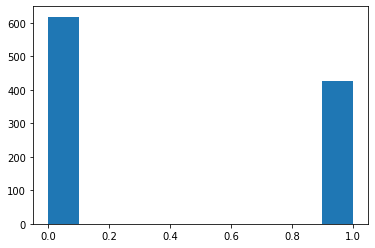

In [17]:
plt.hist(y) # 데이터의 불균형 확인

### x,y값 타입 변환
- 아래와 같은 에러 대처법
- Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [14]:
x.dtype, y.dtype

(dtype('O'), dtype('float32'))

In [18]:
x = np.asarray(x).astype(np.float32)
y = np.asarray(y).astype(np.float32)
x.dtype, y.dtype

(dtype('float32'), dtype('float32'))

## 3. 트레이닝, 테스트 데이터 나누기

In [19]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.2,random_state=42)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((836, 6), (209, 6), (836,), (209,))

## 4. 모델 구성하기

In [ ]:
## 타이타닉 데이터의 x개수는 첫 layer의 input_shape임

## 타이타닉 데이터의 y값은 최종 layer
# 선형회귀, 출력값1, 활성화함수 없음
# 이항분류, 출력값1, 활성화함수 sigmoid
# 이항분류를 원핫인코딩시키면 출력값2, 활성화함수 softmax
# 다항분류는 원핫인코딩해서 해야함. 출력값은 다항분류개수, 활성화함수 softmax

In [21]:
import tensorflow as tf
# model.add를 사용하여 다음을 코딩할 수도 있음.(방법 다양)

model=tf.keras.Sequential([
                           tf.keras.layers.Dense(units=40, activation="relu", input_shape=(6,)),  # input_shape는 x_train.shape의 열값을 튜플로 전달
                           tf.keras.layers.Dense(units=5, activation="relu"),
                           tf.keras.layers.Dense(units=1, activation="sigmoid") # 타이타닉 데이터의 y값은 이항분류 => 따라서 시그모이드 함수 사용, 출력값 1(units) 
])                                                                              

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), # 러닝레이트값 설정(lr), 값이 클수록 간격이 큰 것을 의미
              loss='mse', metrics=['acc']) # loss='binary_crossentropy'(이항분류) or 'mse'(회귀분석)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [27]:
model.summary()

#문제 Param의 출력된 갯수를 계산하여 보세요
# layer1: param1 = 40*6+40 = 280개 또는 6개의 w + 1개의 b => 한세트에 7개의 param*40 = 280개
# layer2: param2 = 5*40(layer1의 dense units수)+5 = 205개 또는 40개의 w + 1개의 b => 한세트에 5개의 param*41 = 205개
# layer3: parma3 = 1*5(layer2의 dense units수)+1 = 6개 또는 5개의 w + 1개의 b => 한세트에 6개의 param*1 = 6개

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                280       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 205       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## 5. 모델 학습 및 평가

In [28]:
# 다른 신경망 네트워크들과 비슷하게 훈련은 fit메소드를 통해 실행하며, 
# EarlyStopping이라는 callback 함수를 사용하여 val_loss가 3번 이상 연속으로 증가한다면 멈추고 
# 최저의 loss를 사용하도록 선언함

history = model.fit(x_train, y_train, epochs=25, batch_size=1, validation_split=0.25, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')]) # 지정한 횟수만큼 에러율이 줄어들지 않으면 그만

Epoch 1/25
627/627 [==============================] - 2s 2ms/step - loss: 0.2456 - acc: 0.5774 - val_loss: 0.2423 - val_acc: 0.5885
Epoch 2/25
627/627 [==============================] - 1s 2ms/step - loss: 0.2462 - acc: 0.5901 - val_loss: 0.2422 - val_acc: 0.5885
Epoch 3/25
627/627 [==============================] - 1s 2ms/step - loss: 0.2438 - acc: 0.5821 - val_loss: 0.2436 - val_acc: 0.5885
Epoch 4/25
627/627 [==============================] - 1s 2ms/step - loss: 0.2439 - acc: 0.5805 - val_loss: 0.2424 - val_acc: 0.5885
Epoch 5/25
627/627 [==============================] - 1s 2ms/step - loss: 0.2444 - acc: 0.5933 - val_loss: 0.2474 - val_acc: 0.5885


<Figure size 864x288 with 0 Axes>

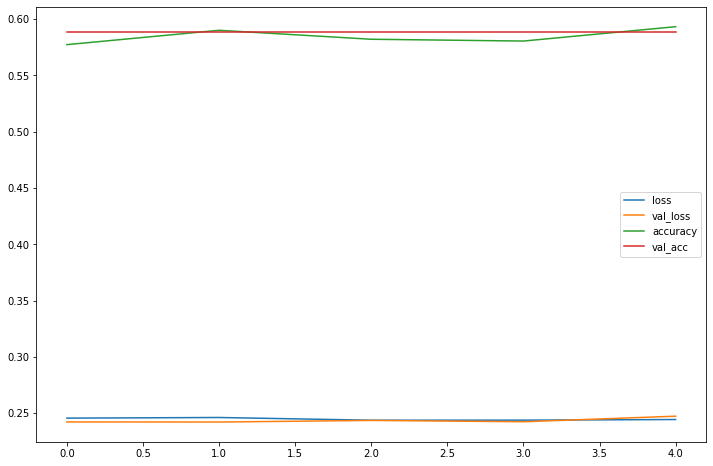

In [29]:
plt.figure(figsize=(12,4))

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['loss','val_loss', 'accuracy','val_acc'])
plt.show()

# loss='binary_crossentropy'(이항분류)으로 할 때보다 loss='mse'를 할 때 결과가 더 좋게 나옴.
# 검증셋의 손실값이 감소하다가 어떤 시점의 에포크에서다시 증가되는양상을 보이면 과적합(overfitting)이 발생한 것 > 과적합 해결(01ipynb의 정리부분 참고)

In [30]:
# 모델 측정
# 손실값, 정확도
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2478 - acc: 0.5742


[0.24782617390155792, 0.5741626620292664]

## 6. 모델 예측

In [34]:
# 모델 예측, 아래의 x0~x8의 데이터를 newX값으로 받아서 예측하여 봅니다.
# 1값에 가까울수록 생존
x0_pclass=1
x3_sex=1
x4_age=20
x5_sibsp=3
x6_parch=2
x8_fate=2
new_x = [[x0_pclass, x3_sex, x4_age, x5_sibsp, x6_parch, x8_fate]] # 반드시 차원을 하나 늘리기

model.predict(new_x)

array([[0.4835111]], dtype=float32)

In [36]:
np.shape(x_test[0]), np.shape(x_test[0:1])

((6,), (1, 6))

In [35]:
# print(model.predict(x_test[0])) # 오류, x_test[0]의 shape: (6,)
print(model.predict(x_test[0:1])) # x_test[0:1]의 shape: (1,6)

[[0.4835111]]


## 7. 모델 저장

In [37]:
model.save('my_ti.h5') # 모델 저장

In [ ]:
# 모델이 저장되면 이 모델만 갖고가면 됨
# 새 파일이라고 가정하고 드라이브 마운트한 다음에
import tensorflow as tf
load_model = tf.keras.models.load_model('my_ti.h5') # 모델 load

x0_pclass=1
x3_sex=1
x4_age=20
x5_sibsp=3
x6_parch=2
x8_fate=2
new_x = [[x0_pclass, x3_sex, x4_age, x5_sibsp, x6_parch, x8_fate]] # 모델을 제작할 때 스케일링을 한 경우에는 예측할 자료값도 스케일링 해야 함

load_model.predict(new_x)